# Livro para consulta:
- https://jakevdp.github.io/PythonDataScienceHandbook/03.08-aggregation-and-grouping.html
- https://jakevdp.github.io/PythonDataScienceHandbook/03.09-pivot-tables.html
    

# 1. Importando bibliotecas <a name="import"></a>

<div style="text-align: right"
     
[Voltar ao índice](#Contents)

In [4]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline

# 2. Carregando o dataframe SINASC <a name="read"></a>
<div style="text-align: right"
     
[Voltar ao índice](#Contents)

In [5]:
sinasc_raw = pd.read_csv('SINASC_RO_2019.csv')
sinasc_raw.head()

,ORIGEM,CODESTAB,CODMUNNASC,LOCNASC,IDADEMAE,ESTCIVMAE,ESCMAE,CODOCUPMAE,QTDFILVIVO,QTDFILMORT,...,KOTELCHUCK,CONTADOR,munResStatus,munResTipo,munResNome,munResUf,munResLat,munResLon,munResAlt,munResArea
0,1,2679477.0,110001,1,19,5.0,8 a 11 anos,NaN,0.0,0.0,...,5,1,ATIVO,MUNIC,Alta Floresta D'Oeste,Rondônia,-11.93554,-61.99982,338.0,7067.025
1,1,2679477.0,110001,1,29,2.0,8 a 11 anos,999992.0,1.0,0.0,...,5,2,ATIVO,MUNIC,Alta Floresta D'Oeste,Rondônia,-11.93554,-61.99982,338.0,7067.025
2,1,2679477.0,110001,1,37,9.0,8 a 11 anos,513205.0,2.0,0.0,...,5,3,ATIVO,MUNIC,Alta Floresta D'Oeste,Rondônia,-11.93554,-61.99982,338.0,7067.025
3,1,2516500.0,110001,1,30,5.0,12 anos ou mais,231205.0,0.0,0.0,...,4,4,ATIVO,MUNIC,Alto Alegre dos Parecis,Rondônia,-12.13178,-61.85308,397.0,3958.273
4,1,2516500.0,110001,1,30,2.0,8 a 11 anos,999992.0,1.0,0.0,...,5,5,ATIVO,MUNIC,Alta Floresta D'Oeste,Rondônia,-11.93554,-61.99982,338.0,7067.025


In [18]:
sinasc_raw.columns
sinasc_raw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27028 entries, 0 to 27027
Data columns (total 69 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   ORIGEM        27028 non-null  int64  
 1   CODESTAB      26913 non-null  float64
 2   CODMUNNASC    27028 non-null  int64  
 3   LOCNASC       27028 non-null  int64  
 4   IDADEMAE      27028 non-null  int64  
 5   ESTCIVMAE     26711 non-null  float64
 6   ESCMAE        26716 non-null  object 
 7   CODOCUPMAE    24121 non-null  float64
 8   QTDFILVIVO    25455 non-null  float64
 9   QTDFILMORT    24930 non-null  float64
 10  CODMUNRES     27028 non-null  int64  
 11  GESTACAO      25796 non-null  object 
 12  GRAVIDEZ      26949 non-null  object 
 13  PARTO         26979 non-null  object 
 14  CONSULTAS     27028 non-null  int64  
 15  DTNASC        27028 non-null  object 
 16  HORANASC      27007 non-null  float64
 17  SEXO          27024 non-null  object 
 18  APGAR1        26932 non-nu

# Tarefa 2

### 1. Crie 2 faixas de Latitude do município (munResLat) sendo uma acima e outra abaixo de -10.5 e aplique o groupby usando essas faixas como chave e realize operações de soma, media, minimo, maximo, mediana, desvio padrao, variancia pra pelo menos 2 variáveis numéricas ainda não utilizadas

In [20]:
lat_dez = pd.cut(sinasc_raw['munResLat'], [-15, -10.5, -8])
sinasc_raw.groupby(lat_dez)['CONSULTAS','QTDGESTANT'].agg([sum,'mean',min,max,'median','std', np.var])


<ipython-input-20-7a2382353e95>:2: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  sinasc_raw.groupby(lat_dez)['CONSULTAS','QTDGESTANT'].agg([sum,'mean',min,max,'median','std', np.var])


CONSULTAS                                               \
                     sum      mean min max median       std       var   
munResLat                                                               
(-15.0, -10.5]     48000  3.694297   1   9      4  0.643372  0.413928   
(-10.5, -8.0]      48662  3.467436   1   9      4  0.888240  0.788970   

               QTDGESTANT                                                  
                      sum      mean  min   max median       std       var  
munResLat                                                                  
(-15.0, -10.5]    15301.0  1.186032  0.0  15.0    1.0  1.304777  1.702444  
(-10.5, -8.0]     17615.0  1.364024  0.0  52.0    1.0  1.492482  2.227501

In [24]:
sinasc_raw.pivot_table(values=['CONSULTAS', 'QTDGESTANT'],
                       index=[lat_dez],
                      aggfunc={'CONSULTAS' : [sum, 'mean', min, max, 'median', 'std', np.var], 
                               'QTDGESTANT' : [sum, 'mean', min, max, 'median', 'std', np.var]})

CONSULTAS                                                     \
                     max      mean median  min       std      sum       var   
munResLat                                                                     
(-15.0, -10.5]       9.0  3.694297    4.0  1.0  0.643372  48000.0  0.413928   
(-10.5, -8.0]        9.0  3.467436    4.0  1.0  0.888240  48662.0  0.788970   

               QTDGESTANT                                                     
                      max      mean median  min       std      sum       var  
munResLat                                                                     
(-15.0, -10.5]       15.0  1.186032    1.0  0.0  1.304777  15301.0  1.702444  
(-10.5, -8.0]        52.0  1.364024    1.0  0.0  1.492482  17615.0  2.227501

### 2. Crie 2 faixas da área dos municípios (munResArea) sendo uma acima e outra abaixo de 3000 e aplique o groupby usando essas faixas como chave e realize operações de soma, media, minimo, maximo, mediana, desvio padrao, variancia pra pelo menos 2 variáveis numéricas ainda não utilizadas


In [28]:
mun_res = pd.cut(sinasc_raw['munResArea'], [0, 3000, 35000])
sinasc_raw.groupby(mun_res)['PARIDADE','munResAlt'].agg([sum,'mean',min,max,'median','std', np.var])

<ipython-input-28-aab7e647f077>:2: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  sinasc_raw.groupby(mun_res)['QTDPARTCES','STCESPARTO'].agg([sum,'mean',min,max,'median','std', np.var])


QTDPARTCES                                                  \
                     sum      mean  min   max median       std       var   
munResArea                                                                 
(0, 3000]         2952.0  0.572981  0.0   5.0    0.0  0.749368  0.561553   
(3000, 35000]    10184.0  0.507070  0.0  12.0    0.0  0.744981  0.554997   

              STCESPARTO                                                 
                     sum      mean  min  max median       std       var  
munResArea                                                               
(0, 3000]        10715.0  2.079775  1.0  9.0    2.0  1.098190  1.206021  
(3000, 35000]    49630.0  2.349016  1.0  9.0    2.0  1.407947  1.982315

In [21]:
sinasc_raw.munResAlt.describe()

count    27027.000000
mean       179.111999
std        123.138365
min         85.000000
25%         87.000000
50%        153.000000
75%        191.000000
max        595.000000
Name: munResAlt, dtype: float64

### 3. Determine faixas na variável munResAlt e aplique o groupby usando essas faixas como chave e realize operações de soma, media, minimo, maximo, mediana, desvio padrao, variancia pra pelo menos 2 variáveis numéricas ainda não utilizadas

In [30]:
mun_res_alt = pd.cut(sinasc_raw['munResAlt'], [0, 100, 300, 600])
sinasc_raw.groupby(mun_res_alt)['TPNASCASSI','STCESPARTO'].agg([sum,'mean',min,max,'median','std', np.var])

<ipython-input-30-58629f952447>:2: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  sinasc_raw.groupby(mun_res_alt)['TPNASCASSI','STCESPARTO'].agg([sum,'mean',min,max,'median','std', np.var])


TPNASCASSI                                                 \
                  sum      mean  min  max median       std       var   
munResAlt                                                              
(0, 100]      10431.0  1.177314  1.0  9.0    1.0  0.467289  0.218359   
(100, 300]    17732.0  1.134630  1.0  9.0    1.0  0.402426  0.161947   
(300, 600]     2746.0  1.108152  1.0  9.0    1.0  0.401358  0.161088   

           STCESPARTO                                                 
                  sum      mean  min  max median       std       var  
munResAlt                                                             
(0, 100]      19977.0  2.404550  1.0  9.0    3.0  1.406245  1.977526  
(100, 300]    35584.0  2.295150  1.0  9.0    2.0  1.384375  1.916493  
(300, 600]     4784.0  1.938412  1.0  9.0    2.0  0.863773  0.746104

### 4. Plote no mesmo grafico ao longo do tempo a idade media das mulheres de cada regiao imediatas de rondonia
https://pt.wikipedia.org/wiki/Lista_de_regi%C3%B5es_geogr%C3%A1ficas_intermedi%C3%A1rias_e_imediatas_de_Rond%C3%B4nia

In [31]:
imediatas = {
    'Candeias do Jamari' : 'Porto Velho',
    'Guajará-Mirim' : 'Porto Velho',
    'Itapuã do Oeste' : 'Porto Velho',
    'Nova Mamoré' : 'Porto Velho',
    'Porto Velho' : 'Porto Velho',
    'Alto Paríso' : 'Ariquemes',
    'Ariquemes' : 'Ariquemes',
    'Buritis' : 'Ariquemes',
    'Cacaulândia' :'Ariquemes',
    'Campo Novo de Rondônia' : 'Ariquemes',
    'Cujubim' : 'Ariquemes',
    'Monte Negro' : 'Ariquemes',
    'Rio Crespo' : 'Ariquemes',
    'Governador Jorge Teixeira' : 'Jaru',
    'Jaru' : 'Jaru',
    "Machadinho d'Oeste" : 'Jaru',
    'Theobroma' : 'Jaru',
    'Vale do Anari' : 'Jaru',
    "Alvorada d'Oeste" : 'Ji-Paraná',
    'Costa Marques' : 'Ji-Paraná',
    'Ji-Paraná' : 'Ji-Paraná',
    'Mirante da Serra' : 'Ji-Paraná',
    'Nova União' : 'Ji-Paraná',
    'Ouro Preto do Oeste' : 'Ji-Paraná',
    'Presidente Médici' : 'Ji-Paraná',
    'São Francisco do Guaporé' : 'Ji-Paraná',
    'São Miguel do Guaporé' : 'Ji-Paraná',
    'Seringueiras' : 'Ji-Paraná',
    'Teixeirópolis' : 'Ji-Paraná',
    'Urupá' : 'Ji-Paraná',
    'Vale do Paraíso' : 'Ji-Paraná',
    "Alta Flores d'Oeste" : 'Cacoal',
    'Alto Alegre dos Parecis' : 'Cacoal',
    'Cacoal' : 'Cacoal',
    'Castanheiras' : 'Cacoal',
    "Espigão d'Oeste" : 'Cacoal',
    'Ministro Andreazza' : 'Cacoal',
    "Nova Brasilândia d'Oeste" : 'Cacoal',
    'Novo Horizonte do Oeste' : 'Cacoal',
    'Parecis' : 'Cacoal',
    'Pimenta Bueno' : 'Cacoal',
    'Primavera de Rondônia' : 'Cacoal',
    'Rolim de Moura' : 'Cacoal',
    "Santa Luzia d'Oeste" : 'Cacoal',
    "São Felipe d'Oeste" : 'Cacoal',
    'Cabixi' : 'Vilhena',
    'Cerejeira' : 'Vilhena',
    'Chupinguaia' : 'Vilhena',
    'Colorado do Oeste' : 'Vilhena',
    'Corumbiara' : 'Vilhena',
    'Pimenteiras do Oeste' : 'Vilhena',
    'Vilhena' : 'Vilhena',
}

In [96]:
sinasc_imediatas = sinasc_raw[['munResNome', 'IDADEMAE', 'DTNASC']]
sinasc_imediatas = sinasc_imediatas.set_index('munResNome')

resultado = sinasc_imediatas.groupby(imediatas).mean()
resultado

,IDADEMAE
Ariquemes,25.497173
Cacoal,26.434757
Jaru,25.805579
Ji-Paraná,26.108682
Porto Velho,26.166303
Vilhena,26.328965


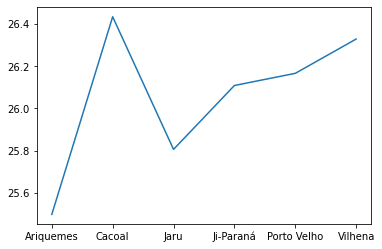

In [61]:
plt.plot(resultado)
plt.show()

### 5. Utilize a tabela do link abaixo e crie faixas utilizando o mapping e gere agrupamentos utilizando essas faixas como chave


### 5.1 IDH
A - https://pt.wikipedia.org/wiki/Lista_de_munic%C3%ADpios_de_Rond%C3%B4nia_por_IDH-M


In [71]:
idh = {
    'Porto Velho' : 'Alto',
    'Vilhena' : 'Alto',
    'Cacoal' : 'Alto',
    'Ji-Paraná' : 'Alto',
    'Pimenta Bueno' : 'Alto',
    'Ariquemes' : 'Alto',
    'Rolim de Moura' : 'Alto',
    'Cerejeiras' : 'Médio',
    'Jaru' : 'Médio',
    'Colorado do Oeste' : 'Médio',
    'Ouro Preto do Oeste' : 'Médio',
    "Espigão d'Oeste" : 'Médio',
    'Santa Luzia' : 'Médio',
    'Pimenteiras do Oeste' : 'Médio',
    'Presidente Médici' : 'Médio',
    'Castanheiras' : 'Médio',
    'Guajará-Mirim' : 'Médio',
    'Chupinguaia' : 'Médio',
    'Cabixi' : 'Médio',
    'Candeias do Jamari' : 'Médio',
    "São Felipe d'Oeste" : 'Médio',
    'Cacaulândia' : 'Médio',
    'São Miguel do Guaporé' : 'Médio',
    'Mirante da Serra' : 'Médio',
    "Alvorada d'Oeste" : 'Médio',
    'Teixerópolis' : 'Médio',
    "Nova Brasilândia d'Oeste" : 'Médio',
    'Rio Crespo' : 'Médio',
    "Alta Floresta d'Oeste" : 'Médio',
    'Ministro Andreazza' : 'Médio',
    'Novo Horizonte do Oeste' : 'Médio',
    'Vale do Paraíso' : 'Médio',
    'Alto Paraíso' : 'Médio',
    'Parecis' : 'Médio',
    'Buritis' : 'Médio',
    'Itapuã do Oeste' : 'Médio',
    'Corumbiara' : 'Médio',
    'Cujubim' : 'Médio',
    'Costa Marques' : 'Médio',
    'São Francisco do Guaporé' : 'Médio',
    'Urupá' : 'Médio',
    'Monte Negro' : 'Médio',
    'Seringueiras' : 'Baixo',
    'Governador Jorge Teixeira' : 'Baixo',
    "Machadinho d'Oeste" : 'Baixo',
    'Campo Novo de Rondônia' : 'Baixo',
    'Alto Alegre dos Parecis' : 'Baixo',
    'Theobroma' : 'Baixo',
    'Nova União' : 'Baixo',
    'Nova Mamoré' : 'Baixo',
    'Vale do Anari' : 'Baixo',
}

In [95]:
sinasc_idh = sinasc_raw[['munResNome', 'QTDFILVIVO', 'DTNASC']]
sinasc_idh = sinasc_idh.set_index('munResNome')

sinasc_idh.groupby(idh).max()

,QTDFILVIVO,DTNASC
Alto,12.0,2019-12-31
Baixo,8.0,2019-12-31
Médio,14.0,2019-12-31


### 5.2 IFDM 
B - https://pt.wikipedia.org/wiki/Lista_de_munic%C3%ADpios_de_Rond%C3%B4nia_por_IFDM


In [97]:
ifdm = {
    'Ariquemes' : 'Moderado',
    'Vilhena' : 'Moderado',
    'Pimenta Bueno' : 'Moderado',
    'Porto Velho' : 'Moderado',
    'Ji-Paraná' : 'Moderado',
    'Cacoal' : 'Moderado',
    "Santa Luzia d'Oeste" : 'Moderado',
    'Rolim de Moura' : 'Moderado',
    'Chupinguaia' : 'Moderado',
    'São Miguel do Guaporé' : 'Moderado',
    'Pimenteiras do Oeste' : 'Moderado',
    'Teixeirópolis' : 'Moderado',
    'Colorado do Oeste' : 'Moderado',
    'Jaru' : 'Moderado',
    'Rio Crespo' : 'Moderado',
    'Primavera de Rondônia' : 'Moderado',
    "Alta Floresta d'Oeste" : 'Moderado',
    'Ouro Preto do Oeste' : 'Moderado',
    'São Franscisco do Guaporé' : 'Moderado',
    'Candeias do Jamari' : 'Moderado',
    'Buritis' : 'Moderado',
    "São Felipe d'Oeste" : 'Moderado',
    'Presidente Médici' : 'Moderado',
    'Cerejeiras' : 'Moderado',
    'Monte Negro' : 'Moderado',
    'Urupá' : 'Moderado',
    "Espigão d'Oeste" : 'Regular',
    'Seringueiras' : 'Regular',
    "Alvorada d'Oeste" : 'Regular',
    'Itapuã do Oeste' : 'Regular',
    'Cabixi' : 'Regular',
    'Novo Horizonte do Oeste' : 'Regular',
    "Nova Brasilândia d'Oeste" : 'Regular',
    'Vale do Paraíso' : 'Regular',
    'Corumbiara' : 'Regular',
    'Alto Paraíso' : 'Regular',
    'Cacaulândia' : 'Regular',
    'Vale do Anari' : 'Regular',
    'Ministro Andreazza' : 'Regular',
    'Costa Marques' : 'Regular',
    'Nova União' : 'Regular',
    'Guajará-Mirim' : 'Regular',
    'Mirante da Serra' : 'Regular',
    'Parecis' : 'Regular',
    'Castanheiras' : 'Regular',
    'Theobroma' : 'Regular',
    "Machadinho d'Oeste" : 'Regular',
    'Campo Novo de Rondônia' : 'Regular',
    'Nova Mamoré' : 'Regular',
    'Cujubim' : 'Regular',
    'Alto Alegre dos Parecis' : 'Regular',
    'Governador Jorge Teixeira': 'Regular',
 }

In [108]:
sinasc_ifdm = sinasc_raw[['munResNome', 'QTDFILMORT']]

sinasc_ifdm = sinasc_ifdm.set_index('munResNome')

sinasc_ifdm.groupby(ifdm).max()

,QTDFILMORT
Moderado,28.0
Regular,7.0


### 5.3 PIB
C - https://pt.wikipedia.org/wiki/Lista_de_munic%C3%ADpios_de_Rond%C3%B4nia_por_PIB


In [109]:
pib = {
    'Porto Velho' : 'Acima de 1 Bilhão',
    'Ji-Paraná' : 'Acima de 1 Bilhão',
    'Vilhena' : 'Acima de 1 Bilhão',
    'Ariquemes' : 'Acima de 1 Bilhão',
    'Cacoal' : 'Acima de 1 Bilhão',
    'Jaru' : 'Acima de 1 Bilhão',
    'Rolim de Moura' : 'Acima de 1 Bilhão',
    'Pimenta Bueno' : 'Acima de 1 Bilhão',
    'Guajará-Mirim' : 'Acima de 500 Milhões',
    'Ouro Preto do Oeste' : 'Acima de 500 Milhões',
    'Buritis' : 'Acima de 500 Milhões',
    'Machadinho do Oeste' : 'Acima de 500 Milhões',
    "Espigão d'Oeste" : 'Acima de 500 Milhões',
    'São Miguel do Guaporé' : 'Acima de 500 Milhões',
    'Candeias do Jamari' : 'Acima de 500 Milhões',
    'Nova Mamoré' : 'Acima de 500 Milhões',
    'Cerejeiras' : 'Acima de 500 Milhões',
    'Alta Floresta do Oeste' : 'Acima de 300 Milhões',
    'Presidente Médici' : 'Acima de 300 Milhões',
    'Cujubim' : 'Acima de 300 Milhões',
    'Nova Brasilândia do Oeste' : 'Acima de 300 Milhões',
    'Alto Paraíso' : 'Acima de 300 Milhões',
    'São Francisco do Guaporé' : 'Acima de 300 Milhões',
    'Colorado do Oeste' : 'Acima de 300 Milhões',
    'Monte Negro' : 'Acima de 200 Milhões',
    'Alto Alegre dos Parecis' : 'Acima de 200 Milhões',
    'Campo novo de Rondônia' : 'Acima de 200 Milhões',
    'Alvorada do Oeste' : 'Acima de 200 Milhões',
    'Chupinguaia' : 'Acima de 100 Milhões',
    'Corumbiara' : 'Acima de 100 Milhões',
    'Ministro Andreazza' : 'Acima de 100 Milhões',
    'Urupá' : 'Acima de 100 Milhões',
    'Costa Marques' : 'Acima de 100 Milhões',
    'Seringueiras' : 'Acima de 100 Milhões',
    'Mirante da Serra' : 'Acima de 100 Milhões',
    'Governador Jorge Teixeira' : 'Acima de 100 Milhões',
    'Theobroma' : 'Acima de 100 Milhões',
    'Santa Luzia do Oeste' : 'Acima de 100 Milhões',
    'Novo Horizonte do Oeste' : 'Acima de 100 Milhões',
    'Itapuã do Oeste' : 'Acima de 100 Milhões',
    'Vale do Paraíso' : 'Acima de 100 Milhões',
    'Caculândia' : 'Acima de 100 Milhões',
    'Cabixi' : 'Acima de 100 Milhões',
    'Vale do Anari' : 'Acima de 100 Milhões',
    'Nova União' : 'Até 100 Milhões',
    'Parecis' : 'Até 100 Milhões',
    'Rio Crespo' : 'Até 100 Milhões',
    'Pimenteiras do Oeste': 'Até 100 Milhões',
    'Teixeirópolis' : 'Até 100 Milhões',
    'São Felipe do Oeste' : 'Até 100 Milhões',
    'Castanheiras' : 'Até 100 Milhões',
    'Primavera de Rondônia' : 'Até 100 Milhões',
}

In [120]:
sinasc_pib = sinasc_raw[['munResNome', 'IDADEMAE']]

sinasc_pib = sinasc_pib.set_index('munResNome')

sinasc_pib.groupby(pib).mean()

,IDADEMAE
Acima de 1 Bilhão,26.265562
Acima de 100 Milhões,25.642295
Acima de 200 Milhões,25.297450
Acima de 300 Milhões,25.706070
Acima de 500 Milhões,25.785927
Até 100 Milhões,26.519894


### Analise as respostas encontradas, tire algum insight delas, conte pra gente algo encontrado nos dados.

Exemplo:
- Ah, descobri que a idade mediana das mulheres que deram a luz no ano de 2019 dos municipios com o PIB mais alto é a maior dentre todas.

#### Ariquemes é a região imediata com a  menor média de idade entre as mães,  as outras 5 regiões se mantém muito parelhas.

#### As cidades onde o IDH é considerado baixo tem a pior Quantidade de Filhos Vivos, com o máximo de 8.

#### Pode-se notar que existem alguns erros na tabela, o valor máximo de Filhos Mortos, é de 28, sendo totalmente fora da realidade, pode ser que existem mais valores assim, tirando a veracidade da análise.